<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Модель-цен-на-автомобили" data-toc-modified-id="Модель-цен-на-автомобили-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Модель цен на автомобили</a></span></li></ul></div>

## Модель цен на автомобили

Имеется набор данных с признаками автомобилей и ценами на них. Необходимо построить предсказание цены

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv( 'cars.csv', delimiter = '\t' )
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,1.0
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,1.0,0.0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,0.0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6.0,3.1,4.0,1.0,0.0,1.0


Самое простое предположение, чтобы рисовать было удобнее

In [3]:
X = data[['Mileage']]
Y = data['Price']

In [4]:
type(Y)

pandas.core.series.Series

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
Y.values.shape

(804,)

In [7]:
X.values.shape

(804, 1)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X, Y)

LinearRegression()

In [11]:
y_predict = model.predict(X)

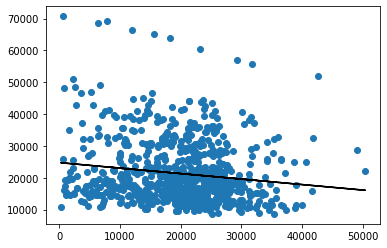

In [12]:
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

Нужно что-то поумнее

In [9]:
# get_dummies автоматом кодирует в числа разные словестные признаки
X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', 'Make']])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221.0,3.1,1,0,0,0,0,0
1,9135.0,3.1,1,0,0,0,0,0
2,13196.0,3.1,1,0,0,0,0,0
3,16342.0,3.1,1,0,0,0,0,0
4,19832.0,3.1,1,0,0,0,0,0


In [10]:
Y = data.loc[ :, ['Price'] ]
Y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [37]:
model = LinearRegression()

In [38]:
model.fit(X, Y)
y_predict = model.predict(X)

Попробуем нарисовать как расходится факт с предсказаниями

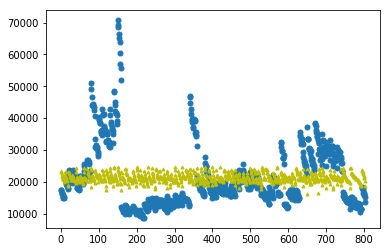

In [39]:
plt.plot(Y.index, Y, 'o', markersize = 5)
plt.plot(Y.index, y_predict, 'y^', markersize = 3)
plt.show()

In [40]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [41]:
model.intercept_

24764.559006060575

In [42]:
model.coef_

array([-0.1725205])